# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [10]:
 
# x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
# y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

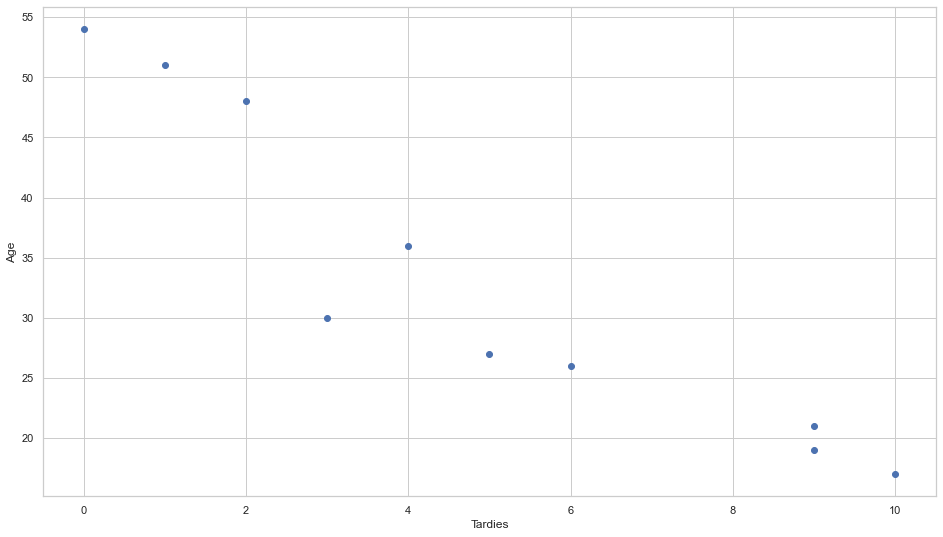

In [35]:
plt.scatter(student_data.Tardies, student_data.Age)
plt.xlabel('Tardies')
plt.ylabel('Age')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [65]:
#habia creado otra columna con la inversa de Tardies pero he visto que se puede hacer de otra manera
student_data = student_data.drop(['Tardies_inversa'], axis = 1)

In [66]:
'''
Lo que queremos averiguar es ---> Age = 𝑚 ∗ Tardies + n
Mi hipótesis es la siguiente, cuanto mas mayor eres, menos tarde llegas 
¡AQUI NOS DAMOS CUENTA QUE ES EL MODELO LINEAL INVERSO! OJOOOO!!

Tardies = Age - 0.1 * Tardies 
'''
student_data["prediction_1"] = student_data.Age - 0.1 * student_data.Tardies
student_data['error_1'] = (student_data.Age - student_data.prediction_1).abs()

student_data

,Age,Tardies,prediction_1,error_1
0,17,10,16.0,1.0
1,51,1,50.9,0.1
2,27,5,26.5,0.5
3,21,9,20.1,0.9
4,36,4,35.6,0.4
5,48,2,47.8,0.2
6,19,9,18.1,0.9
7,26,6,25.4,0.6
8,54,0,54.0,0.0
9,30,3,29.7,0.3


In [63]:
student_data.error_1.mean()

0.4900000000000002

In [68]:
'''
fig, ax = plt.subplots()
sns.scatterplot(x=student_data["Tardies"], y=student_data["Age"])

plt.plot(student_data.Tardies, student_data.prediction_1, color='r')
plt.show()
'''

'\nfig, ax = plt.subplots()\nsns.scatterplot(x=student_data["Tardies"], y=student_data["Age"])\n\nplt.plot(student_data.Tardies, student_data.prediction_1, color=\'r\')\nplt.show()\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [79]:
mean_Tardies = student_data.Tardies.mean()
mean_Age = student_data.Age.mean()

#Calculo de la covarianza
covarianza = student_data.cov()["Tardies"]["Age"]
print(covarianza)

# Calculo de la correlacion
r = student_data.corr(method="pearson")["Tardies"]["Age"]
print(r)

-45.56666666666667
-0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here.

Plot your regression model on your scatter plot.

In [ ]:
# Your code here.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [83]:
# Import any libraries you may need & the data
from sklearn.linear_model import LinearRegression

data = pd.read_csv("vehicles.csv")
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [103]:
# Mediante el metodo pearson podemos sacaras las correlaciones entre dos variables
# Lo elevo al cuadrado porque sino me salen correlaciones negativas Y NO PUEDEN HABER CORRELACIONES NEGATIVAS (NECESITAMOS VALORES ABSOLUTOS)


corr_1 = data.corr(method="pearson")["Year"]["CO2 Emission Grams/Mile"]
print("Coeficiente de correlación de Pearson: ", corr_1 ** 2)


corr_2 = data.corr(method="pearson")["Cylinders"]["CO2 Emission Grams/Mile"]
print("Coeficiente de correlación de Pearson: ", corr_2 ** 2)

corr_3 = data.corr(method="pearson")["Fuel Barrels/Year"]["CO2 Emission Grams/Mile"]
print("Coeficiente de correlación de Pearson: ", corr_3 ** 2)

corr_4 = data.corr(method="pearson")["Combined MPG"]["CO2 Emission Grams/Mile"]
print("Coeficiente de correlación de Pearson: ", corr_4 ** 2)

corr_5 = data.corr(method="pearson")["Fuel Cost/Year"]["CO2 Emission Grams/Mile"]
print("Coeficiente de correlación de Pearson: ", corr_5 ** 2)

Coeficiente de correlación de Pearson:  0.04941711347197903
Coeficiente de correlación de Pearson:  0.5660945549075932
Coeficiente de correlación de Pearson:  0.9725680773393249
Coeficiente de correlación de Pearson:  0.8579002325642328
Coeficiente de correlación de Pearson:  0.8665099297563552


##### La maxima correlacion no la encontramos en la relacion con la variable "Fuel Barrels/Year" por lo tanto escogeria esa porque es la mejor

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 